### Random Forest Algorithm


Random Forest Algorithm is one of the supervised learning methods.
Implementing the same on a dataset named Car_Evaluation.

In [1]:
# Importing all essential libraries required for implementation of random forest (1)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, f1_score
from sklearn.model_selection import train_test_split   
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset and storing it in the data frame named 'df'

datfrm=pd.read_csv("C:/Users/Triparna Chatterjee/Desktop/TB1/SCEM/car_evaluation.csv",header=None)

In [3]:
# Displaying the top five rows of the data set (1)

datfrm.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# Renaming the columns and again displaying top 5 rows of the data to make it more understandable (1)

col_names = ['Cost', 'Maint', 'Door', 'People', 'Boot_size', 'Safety', 'Class']
datfrm.columns=col_names
datfrm.head()

,Cost,Maint,Door,People,Boot_size,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Displaying the dataset summary (1)
datfrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Cost       1728 non-null   object
 1   Maint      1728 non-null   object
 2   Door       1728 non-null   object
 3   People     1728 non-null   object
 4   Boot_size  1728 non-null   object
 5   Safety     1728 non-null   object
 6   Class      1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
# Finding the sum of number of null values in all the column (1)
datfrm.isnull().sum()

Cost         0
Maint        0
Door         0
People       0
Boot_size    0
Safety       0
Class        0
dtype: int64

In [7]:
# Count the number of occurrences of each unique value in the columns of dataset (1)

for i in col_names:
    print(datfrm[i].value_counts())

Cost
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Door
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
People
2       576
4       576
more    576
Name: count, dtype: int64
Boot_size
small    576
med      576
big      576
Name: count, dtype: int64
Safety
low     576
med     576
high    576
Name: count, dtype: int64
Class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [8]:
# We see that for the column door there's a value '5more' which is not appropriate,
# Renaming it as '5 or more'

datfrm.replace('5more','5 or more',inplace=True)

In [9]:
# And now display all the unique values occuring in all the columns (1)

def show(datfrm):
    for i in datfrm.columns[0:]:
        print("Column: {} can have values:  {} ".format(i,datfrm[i].unique()))
    
show(datfrm)

Column: Cost can have values:  ['vhigh' 'high' 'med' 'low'] 
Column: Maint can have values:  ['vhigh' 'high' 'med' 'low'] 
Column: Door can have values:  ['2' '3' '4' '5 or more'] 
Column: People can have values:  ['2' '4' 'more'] 
Column: Boot_size can have values:  ['small' 'med' 'big'] 
Column: Safety can have values:  ['low' 'med' 'high'] 
Column: Class can have values:  ['unacc' 'acc' 'vgood' 'good'] 


Since the data is clean proceeding with the further process

In [10]:
# Dropping last column which the target and selecting rest (1)

# Putting feature variable to X
X=datfrm.drop('Class',axis=1)

# Putting target variable to y
y=datfrm['Class']


In [11]:
# Splitting the data into training set and testing set (1)
# Let 30% of dataset be used for testing and 70% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [12]:
# Since we can clearly see that order is an important for features and variables here are categorical
# Hence using ordinal encoding (1)

ord_enc=OrdinalEncoder()
X_train=ord_enc.fit_transform(X_train)
X_test=ord_enc.transform(X_test)

In [13]:
# Checking the shape of X_train and X_test (1)

X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [14]:
# Building the Random Forest Model
# Using Default Hyperparameters

randomfc=RandomForestClassifier( n_estimators=100,
                           criterion='gini',
                           max_depth=None,
                           min_samples_split=2,
                           min_samples_leaf=1,
                           max_features='sqrt',
                           bootstrap=True,
                          )

In [15]:
# Training the dataset using random forest classifier model (1)
randomfc.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
# Make predictions on the test dataset (X_test) and train dataset (X_train) 
# using the dataset trained in Random Forest classifier 'randomfc' model (1)

y_pred_test= randomfc.predict(X_test)
y_pred_train = randomfc.predict(X_train)

# evaluating the acuaracy of the testing
print("The accuracy of Testing is:") 
print(accuracy_score(y_pred_test, y_test))

# evaluating the acuaracy of the training
print("The accuracy of Training is:") 
print(accuracy_score(y_pred_train, y_train))

The accuracy of Testing is:
0.9672447013487476
The accuracy of Training is:
1.0




Splitting the training data into a smaller subset to test the performance of the model:


In [17]:
# Define the train sizes to iterate over
train_sizes = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# Initialize a dictionary to store the results
results=[]
variances=[]

# Iterate over the train sizes and train the model
for train_size in train_sizes:
    # Split the dataset using train_test_split
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, train_size=train_size)
    
    #using ordinal encoding
    ord_enc=OrdinalEncoder()
    X_train_sub=ord_enc.fit_transform(X_train_sub)
    X_test_sub=ord_enc.fit_transform(X_test_sub)
    
    # Train a Random Forest classifier on the training subset
    randomfc.fit(X_train_sub,y_train_sub)
    
    # Evaluate the model's accuracy on the test subset
    y_pred_sub = randomfc.predict(X_test_sub)
    accuracy = accuracy_score(y_test_sub, y_pred_sub)
    results.append(accuracy)     
    
    # Compute probabilistic predictions
    y_pred_proba_sub = randomfc.predict_proba(X_test_sub)
    
    # Compute the variance of the predicted probabilities
    variance = np.var(y_pred_proba_sub, axis=0).mean()  # Compute the mean variance across classes
    variances.append(variance)
    
    # Print the accuracy for the current train size
    print(f"Train Size: {train_size},    Accuracy: {accuracy:.4f},    Variance of Probabilities: {variance:.4f}")



Train Size: 0.9,    Accuracy: 0.9827,    Variance of Probabilities: 0.0751
Train Size: 0.8,    Accuracy: 0.9855,    Variance of Probabilities: 0.0730
Train Size: 0.7,    Accuracy: 0.9672,    Variance of Probabilities: 0.0723
Train Size: 0.6,    Accuracy: 0.9624,    Variance of Probabilities: 0.0678
Train Size: 0.5,    Accuracy: 0.9421,    Variance of Probabilities: 0.0639
Train Size: 0.4,    Accuracy: 0.9489,    Variance of Probabilities: 0.0600
Train Size: 0.3,    Accuracy: 0.9248,    Variance of Probabilities: 0.0553
Train Size: 0.2,    Accuracy: 0.8908,    Variance of Probabilities: 0.0529
Train Size: 0.1,    Accuracy: 0.8348,    Variance of Probabilities: 0.0381


We see that when the model is trained on random subsets of training datasets, when the training is size is small the accuracy obtained is less, as the data size on using which the model lgets oppurtunity to learn more hence more accurate predictions

### Metrics

In [18]:
# Using Metrics for comparing the results of the y_test (tested values) and y_test_pred (predicted tested values)
# and  y_train (trained values) and y_train_pred (predicted trained values) (1)

print(" ClassificationReport for Test data: ")
print(classification_report(y_test, y_pred_test))

print(" Classification Report for Train data: ")
print(classification_report(y_train, y_pred_train))

 ClassificationReport for Test data: 
              precision    recall  f1-score   support

         acc       0.92      0.95      0.93       128
        good       0.83      0.75      0.79        20
       unacc       0.99      0.99      0.99       351
       vgood       0.94      0.85      0.89        20

    accuracy                           0.97       519
   macro avg       0.92      0.88      0.90       519
weighted avg       0.97      0.97      0.97       519

 Classification Report for Train data: 
              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       256
        good       1.00      1.00      1.00        49
       unacc       1.00      1.00      1.00       859
       vgood       1.00      1.00      1.00        45

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209



In [19]:
# Random forest is used for feature selection also. (1)
# It has feature importance property which shows which all feature are dependant on the target variable.

randomfc.feature_importances_

array([0.18706456, 0.16713881, 0.09945262, 0.19740346, 0.10348165,
       0.24545889])

In [20]:
# Tabulating the importance of the features in decending order

df = pd.DataFrame({'Column features':datfrm.drop('Class',axis=1).columns,'score':randomfc.feature_importances_})

df_sorted = df.sort_values(by='score', ascending=False)

print(df_sorted)

  Column features     score
5          Safety  0.245459
3          People  0.197403
0            Cost  0.187065
1           Maint  0.167139
4       Boot_size  0.103482
2            Door  0.099453


From the above table we can see that the 'Safety' is the most important feature and 'Door' is the least important one for determining the target 'Class'

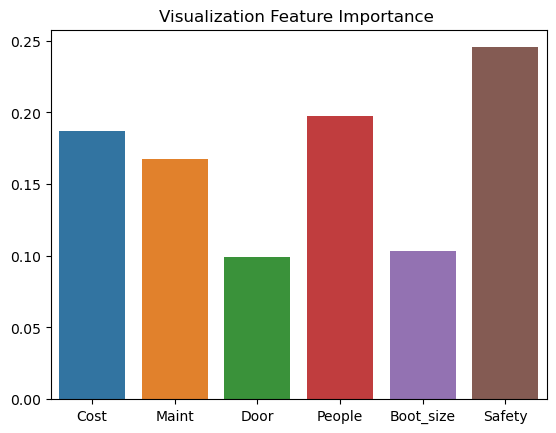

In [21]:
# Create a seaborn bar plot  to visualise the same

sns.barplot(x=datfrm.drop('Class',axis=1).columns,y=randomfc.feature_importances_)

# Adds the labels to the graph 
plt.xlabel=('Feature Importance Score')

plt.ylabel=('Features')

# adding title to the graph 
plt.title('Visualization Feature Importance ')

# visualize the graph
plt.show()

Since lower the score indicates that feature is not dependant on target and vice-versa, we can conclude that 'Safety' is most important feature for determining the 'Class' and similarly 'Door' is the least important feature for the same. 

 ### Hyperparameter Tuning

The Random Forest Model is performing well and giving an accuracy of 96.72 %, tuning the hyperparameter to check if there's any further improvement in the accuracy.

In [22]:
#Declaring all the possible values in various hyperparameters to  be used in the grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# criterion
criteria = [ 'gini','entropy']

In [23]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [24]:
# Instantiate the Grid Search process
randfor_grid = GridSearchCV(estimator = randomfc, param_grid = param_grid, cv = 3, verbose=1, n_jobs = -1)

In [25]:
# Fit the Grid Search Cross Validation to data
randfor_grid.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157,
                                          178, 200]},
             verbose=1)

In [26]:
# Displaying the best parameter obtained after performing the hyperparameter tuning (2)

print(randfor_grid.best_params_)

{'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [28]:
# Using the tuned parameters obtained from GridSearchCV to fit the data (2)

rfc=RandomForestClassifier(bootstrap= True,
 max_depth= 4,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 10)

randomfc.fit(X_train,y_train)

y_pred_hp=randomfc.predict(X_test)

In [29]:
# calculating the accuracy of obtained using 
accuracy_score(y_pred_hp, y_test)

0.9595375722543352

We can conclude that by tuning the parameters of model, it is not performing more efficiently, so the tuned parameter will not be preferred over the default parameters in this case.

### Testing the data other models like SVM, Logistc Regression and Decision Tree for this to compare which among the four including random forest works the best

1. Support Vector Machine

In [30]:
# Using the Support Vector Machine Model(3)

SupVecMach=SVC(kernel='linear',C=1.0)
SupVecMach.fit(X_train,y_train)

y_pred_SVM=SupVecMach.predict(X_test)

# Displaying random predicted vs real output for SVM
frame={'Predict': y_pred_SVM,'Real': y_test}
datfrm_SupVecMach=pd.DataFrame(frame)
datfrm_SupVecMach.tail()

,Predict,Real
1008,unacc,unacc
970,unacc,acc
1480,unacc,acc
746,acc,acc
1366,unacc,acc


In [31]:
print("The accuracy of Support Vector Machine is:")
accuracy_score(y_pred_SVM,y_test)

The accuracy of Support Vector Machine is:


0.6917148362235067

2. Decision Tree

In [32]:
# Using the Decision Tree Model (3)
one_dec_tree = DecisionTreeClassifier()
one_dec_tree.fit(X_train, y_train)

y_pred_DecTree=one_dec_tree.predict(X_test)

# Displaying random predicted vs real output for Decision Tree
frame={'Predict': y_pred_DecTree,'Real': y_test}
datfrm_DecTree=pd.DataFrame(frame)
datfrm_DecTree.tail()

,Predict,Real
1008,unacc,unacc
970,acc,acc
1480,acc,acc
746,acc,acc
1366,acc,acc


In [33]:
print("The accuracy of Decision Tree is:")
accuracy_score(y_pred_DecTree,y_test)

The accuracy of Decision Tree is:


0.9595375722543352

3. Logistic Regression

In [34]:
# Using the Logistic Regression Model (4)
LogReg = LogisticRegression(max_iter = 1000,random_state = 48)
LogReg.fit(X_train,y_train)

y_pred_LogReg=LogReg.predict(X_test)

# Displaying random predicted vs real output for Logistic Regression
frame={'Predict': y_pred_LogReg,'Real': y_test}
datfrm_LogReg=pd.DataFrame(frame)
datfrm_LogReg.tail()

,Predict,Real
1008,unacc,unacc
970,unacc,acc
1480,unacc,acc
746,unacc,acc
1366,unacc,acc


In [35]:
print("The accuracy of Logistic Regression is:")
accuracy_score(y_pred_LogReg,y_test)

The accuracy of Logistic Regression is:


0.6608863198458574

Comparing all the four models: Random Forest, Support Vector Machine, Decision Tree and Logistic Regression we find that Random Forest performs the best giving the highest accuracy of 96.72% and Logistic Regression performs the worst giving accuracy of 66.08%

1. Random Forest          : 96.72 %
2. Decision Tree          : 95.95 %
3. Support Vector Machine : 69.17 %
4. Logistic Regression    : 66.08 %